# <center>Aston University <br/><br/> CS3IVP: Image and Video Processing <br/><br/> Lab 06: Image Sharpening</center>

Lecturers:<br/>
Debaleena Roy <a href="mailto:d.roy@aston.ac.uk">d.roy@aston.ac.uk</a> <br/>
Office: MB265K <br/>

Martin Rudorfer <a href="mailto:m.rudorfer@aston.ac.uk">m.rudorfer@aston.ac.uk</a> <br/>
Office: MB214G <br/>

## Goals
The goals of this lab are:
1. To continue practising image filtering.
2. To use image filtering to sharpen greyscale images.


## Instructions
No submission is required for this laboratory.


## Task 6.1 Previous laboratories
Make sure that you have completed all previous laboratories and that you have no doubts after the lab. If you have any, please ask, we are here to help you.

First of all, **run the cell below**. It loads modules that might be of interest for this laboratory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
import scipy.ndimage

## Task 6.2
**Write** a function `scale_matrix` which takes a greyscale image (or a 2D array in general) as input, **scales** it so that it would be displayable as an 8-bit greyscale image and returns the result. 

**Apply** your function to the `input_array` defined below and display the result.
- In last week's lecture, we defined points, lines, and edges.
- Inspect the result and identify which of the three are present.

**Apply** the 3x3 box filter to the image (as we have done in previous labs) and display the result in the same cell.
- Take a close look at the points/lines/edges identified.
- Discuss with your neighbours how the filter changes the appearance of those.

**Hints**:
- We need to calculate the minimum and maximum values in some matrix as part of this process. NumPy has functions `np.min()` and `np.max()` which will do this automatically.
- We should not assume that the input is an array of `np.uint8` or `float` cells. What should we do to make sure that we can perfom the operations required? What should we do to ensure that the output is of the type we need for unsigned integers with $c_{max}=255$?

**Advanced (optional)**:
- We always used the function `scipy.ndimage.correlate()` with `mode="constant"` and `cval=0.0`.
- This is a good opportunity to test other values and also other modes to see what effect it has at the border of the image.

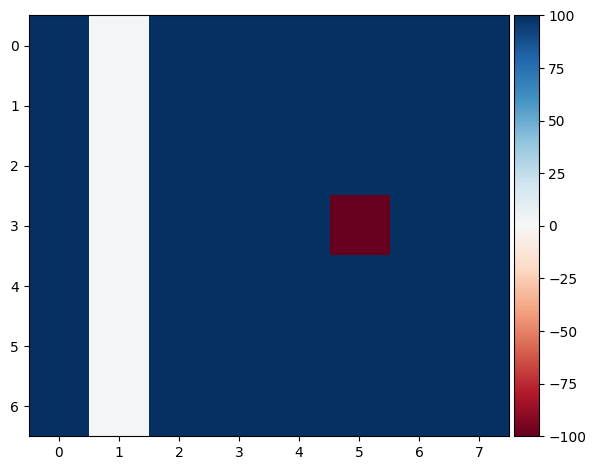

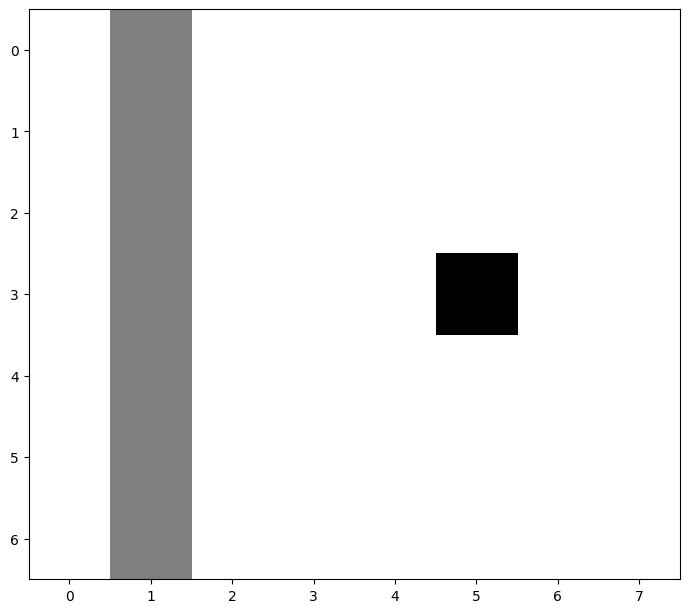

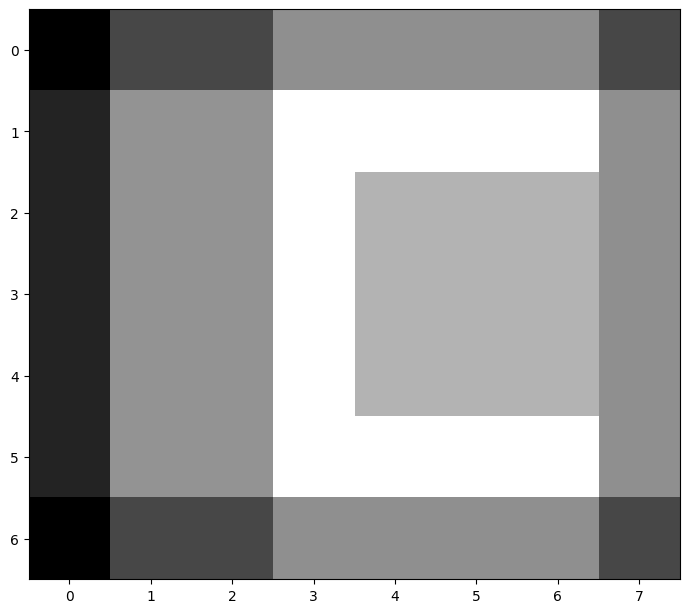

In [4]:
input_array = np.array([[100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100,-100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100],
                        [100, 1, 100, 100, 100, 100, 100, 100]])

# Hint for the box filter...
box = np.array([[1., 1., 1],
                [1., 1., 1],
                [1., 1., 1]])/9.

# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def scale_matrix(image):
    array = np.array(image, dtype=float)
    ret = array-np.min(array)
    ret = ret/np.max(ret)
    ret = ret*255.
    return ret.astype(np.uint8)

imshow(input_array)
scaled = scale_matrix(input_array)
plt.figure(figsize=(7,8))
imshow(scaled)

def box_filter(input_image):
    return scipy.ndimage.correlate(input_image, box, mode="constant", cval=0).astype(np.uint8)

filtered = scale_matrix(box_filter(input_array))
plt.figure(figsize=(7,8))
imshow(filtered);


# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## Task 6.3
**Write** a function `display_laplacian_result` which takes a greyscale image matrix as input and displays the scaled Laplacian (calculated as described in the Image Sharpening lecture slides).

**Apply** the function to several test images:
- Try it on the `input_array` from above and discuss the difference in response to certain image features.
- Use the `camera.bmp` image given on blackboard.
- Try to find other images and apply your filter on them.
What general effects can you observe?

**Hints:**
- You will need to make use of the function scale_matrix from Task 6.2 to ensure the correct scale - but at which point of the process?
- Make sure that the image that you correlate is made of floats temporarily so that the output is also float. Why is that necessary?

For good style, your function should be modular (*i.e.*, it should split its task into suitable sub-tasks, only allowing each sub-task access to the information that it needs).

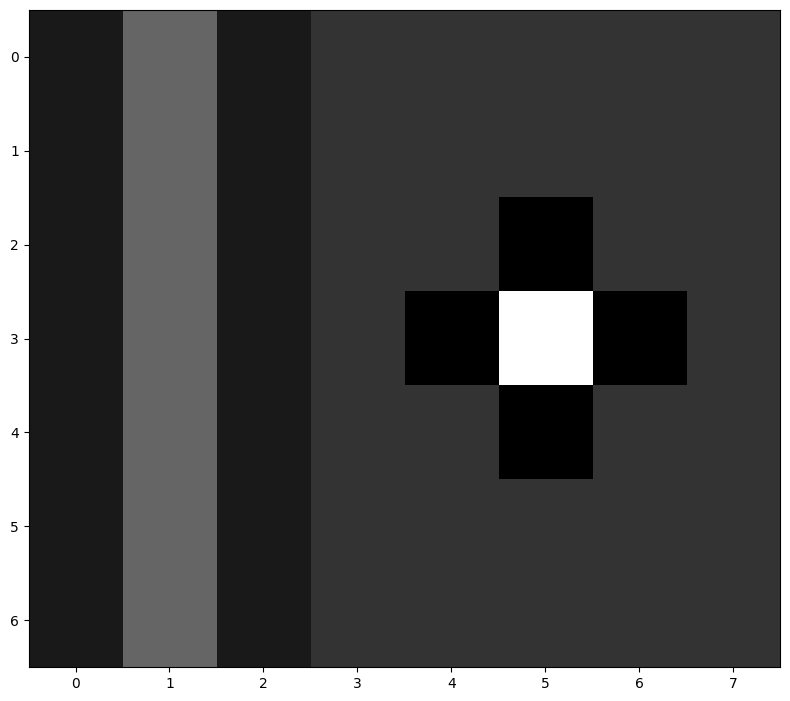

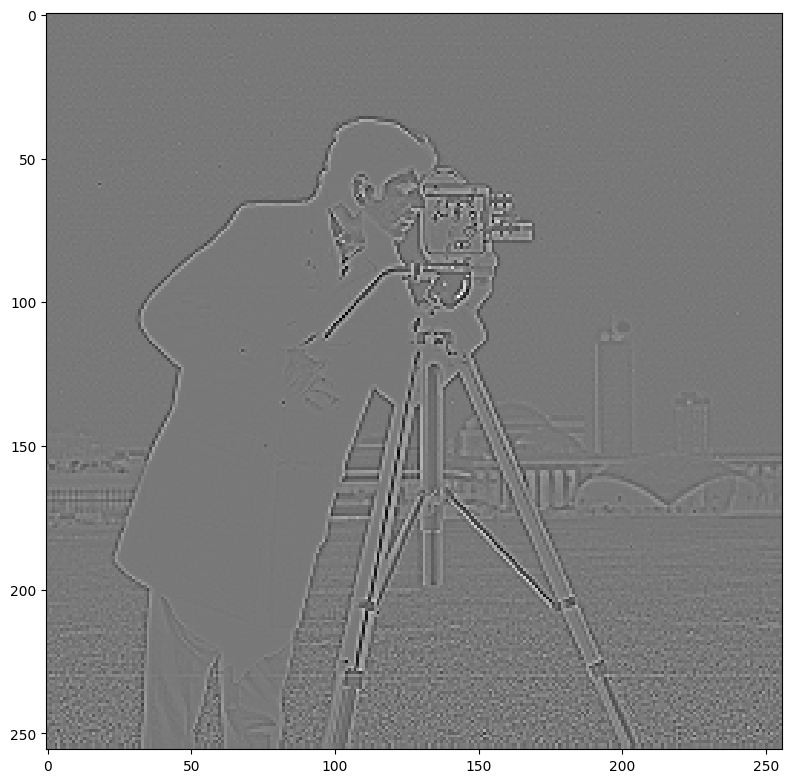

In [5]:
# WRITE YOUR CODE BELOW (DO NOT DELETE THIS LINE)

def display_laplacian_result(image):
    filter_mask = np.array([[0,1,0], 
                            [1,-4,1], 
                            [0,1,0]])

    filtred = scipy.ndimage.correlate(image.astype(float), filter_mask)
    scaled = scale_matrix(filtred)
    plt.figure(figsize=(8,8))
    imshow(scaled)
    
# apply to image from previous cell
display_laplacian_result(scaled)

# apply to new image
image = imread('camera.bmp')
display_laplacian_result(image)
# WRITE YOUR CODE ABOVE (DO NOT DELETE THIS LINE)

## End of lab 06